In [9]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['Добрый', 'день', 'simpleone', 'support', 'auchan', 'ошибка', 'работает', 'connect', 'Проблема', 'RU'])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import pandas as pd
df_train = pd.read_csv('/N.csv', sep = ';')
df_train.head()

,Номер,Заявитель,Тема,Описание,Краткое описание,Статус,Приоритет,Кому назначен,SLA нарушено,Инфраструктурный инцидент,Кем создано,Когда создано,Кем изменено,Когда изменено
0,INC0005659,Ivan Zhigalov,Утром опять завис и рестартнул контейнер аттач...,NaN,NaN,Закрыт,Критичный,Yuriy Ryabovichev,ЛОЖЬ,ЛОЖЬ,Ivan Zhigalov,2022-12-30 10:59:15,Aleksandr Zhulanov,2023-01-09 12:06:28
1,INC0005658,Людмила Романенко,Задержка в выборке писем из ящика после простоев,"Добрый день,\n\nНаблюдаем уже не первый раз. П...",NaN,В разработке,Высокий,Yuriy Ryabovichev,ЛОЖЬ,ЛОЖЬ,Людмила Романенко,2022-12-30 10:46:29,Yuriy Ryabovichev,2023-01-26 13:58:48
2,INC0005657,Дмитрий Мелькин,Проблема с отображением Related Tickets,Добрый день!\nПосле обновления платформы некот...,NaN,Закрыт,Высокий,Nikolay Mamchenko,ЛОЖЬ,ЛОЖЬ,Дмитрий Мелькин,2022-12-29 14:50:23,Дмитрий Мелькин,2023-01-16 13:43:07
3,INC0005656,Pavel Taranov,Некорректное отображение кнопок UI-action на ф...,На портальной форме кнопки не имеют по дефолту...,NaN,Закрыт,Низкий,Vladislav Safonov,ЛОЖЬ,ЛОЖЬ,Pavel Taranov,2022-12-29 12:42:14,System User,2023-01-24 14:30:56
4,INC0005655,Людмила Романенко,GRPC Server is unavailable,"Добрый день, на проде в ошибках появилось сооб...",NaN,В разработке,Высокий,Yuriy Ryabovichev,ЛОЖЬ,ЛОЖЬ,Maksim Zheleznyakov,2022-12-29 12:11:09,Yuriy Ryabovichev,2023-10-06 11:29:27


In [58]:
df_train = df_train.dropna(subset=['Описание'])

In [41]:
df_train

,Номер,Заявитель,Тема,Описание,Краткое описание,Статус,Приоритет,Кому назначен,SLA нарушено,Инфраструктурный инцидент,Кем создано,Когда создано,Кем изменено,Когда изменено
1,INC0005658,Людмила Романенко,Задержка в выборке писем из ящика после простоев,"Добрый день,\n\nНаблюдаем уже не первый раз. П...",NaN,В разработке,Высокий,Yuriy Ryabovichev,ЛОЖЬ,ЛОЖЬ,Людмила Романенко,2022-12-30 10:46:29,Yuriy Ryabovichev,2023-01-26 13:58:48
2,INC0005657,Дмитрий Мелькин,Проблема с отображением Related Tickets,Добрый день!\nПосле обновления платформы некот...,NaN,Закрыт,Высокий,Nikolay Mamchenko,ЛОЖЬ,ЛОЖЬ,Дмитрий Мелькин,2022-12-29 14:50:23,Дмитрий Мелькин,2023-01-16 13:43:07
3,INC0005656,Pavel Taranov,Некорректное отображение кнопок UI-action на ф...,На портальной форме кнопки не имеют по дефолту...,NaN,Закрыт,Низкий,Vladislav Safonov,ЛОЖЬ,ЛОЖЬ,Pavel Taranov,2022-12-29 12:42:14,System User,2023-01-24 14:30:56
4,INC0005655,Людмила Романенко,GRPC Server is unavailable,"Добрый день, на проде в ошибках появилось сооб...",NaN,В разработке,Высокий,Yuriy Ryabovichev,ЛОЖЬ,ЛОЖЬ,Maksim Zheleznyakov,2022-12-29 12:11:09,Yuriy Ryabovichev,2023-10-06 11:29:27
5,INC0005654,Роман Наумов,Некорректное назначение ролей пользователям гр...,1. создали роль Специалист\n2. привязали к ро...,NaN,Закрыт,Высокий,Vladislav Safonov,ЛОЖЬ,ЛОЖЬ,Роман Наумов,2022-12-29 11:59:21,System User,2023-01-16 18:26:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,INC0003656,Андрей Кузин,Не корректно выполнен запрос REQ0002887,Добрый день. В рамках запроса REQ0002887 был о...,NaN,Закрыт,Критичный,Aleksandr Zhulanov,ЛОЖЬ,ЛОЖЬ,Aleksandr Zhulanov,2022-01-10 14:17:05,System User,2022-12-15 17:04:31
1582,INC0003655,Boris Bulgakov,Восстановление доступа на home.simpleone.ru,\n\nПропала возможность входа на home.simpleo...,NaN,Закрыт,Низкий,Aleksandr Zhulanov,ЛОЖЬ,ЛОЖЬ,Aleksandr Zhulanov,2022-01-10 14:03:15,System User,2022-12-15 17:06:15
1584,INC0003653,Maksim Zheleznyakov,Исходящее письмо обработано со статусом Failed...,Notification Type:: PROBLEM\n Service: Outgoi...,NaN,Закрыт,Высокий,Aleksandr Zhulanov,ЛОЖЬ,ИСТИНА,Aleksandr Zhulanov,2022-01-10 10:28:29,System User,2022-12-15 17:04:16
1585,INC0003652,Roman Braslavsky,Уязвимость на инстансе,Добрый день!\nЗаказчиком была обнаружена уязви...,NaN,Закрыт,Высокий,Aleksandr Zhulanov,ЛОЖЬ,ЛОЖЬ,Roman Braslavsky,2022-01-10 09:55:00,System User,2022-12-15 17:04:27


<Axes: >

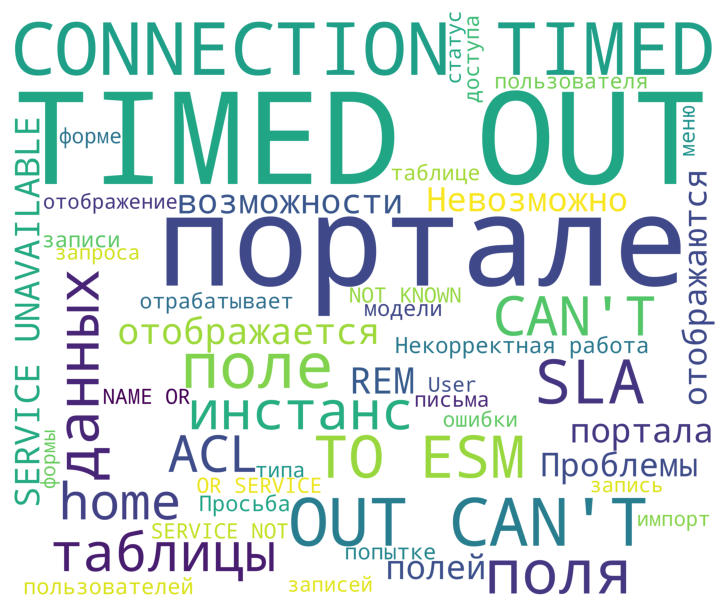

In [10]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=russian_stopwords,
                              width=3000,
                              height=2500,
                              max_words=50,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(df_train['Тема'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [83]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Замените 'Описание' на фактическое имя вашей колонки
descriptions = df_train['Тема'].dropna()

# Преобразование текстовых данных в матрицу TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(descriptions)

# Кластеризация методом KMeans
num_clusters = 3  # Укажите желаемое количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Добавление меток кластеров в DataFrame
df_train['Cluster'] = kmeans.labels_

# Вывод результатов
print(df_train[['Тема', 'Cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                   Тема  Cluster
0     Утром опять завис и рестартнул контейнер аттач...        1
1      Задержка в выборке писем из ящика после простоев        1
2               Проблема с отображением Related Tickets        1
3     Некорректное отображение кнопок UI-action на ф...        0
4                            GRPC Server is unavailable        1
...                                                 ...      ...
1582        Восстановление доступа на home.simpleone.ru        1
1583     Исходящее письмо обработано со статусом Failed        1
1584  Исходящее письмо обработано со статусом Failed...        1
1585                             Уязвимость на инстансе        1
1586  На продакшн-инстансе, перестали регистрировать...        1

[1587 rows x 2 columns]


In [87]:
df_0 = df_train[df_train['Cluster'] == 0]
df_1 = df_train[df_train['Cluster'] == 1]
df_2 = df_train[df_train['Cluster'] == 2]

<Axes: >

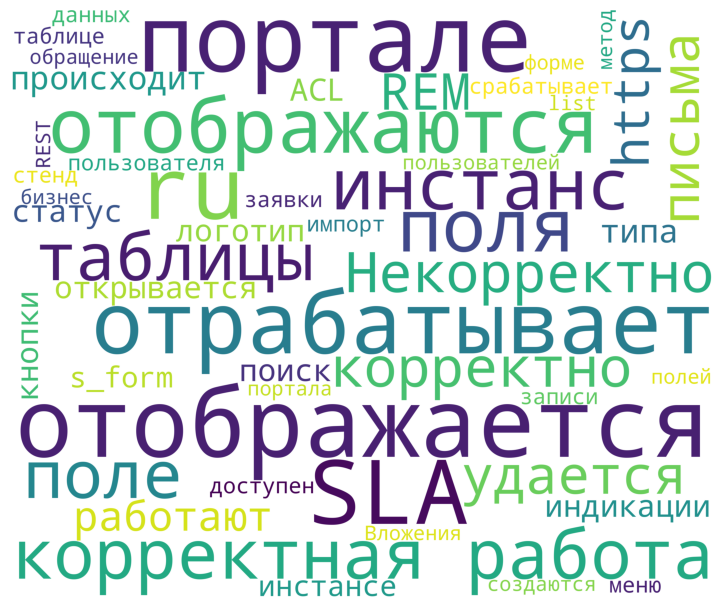

In [86]:
corpus = get_corpus(df_0['Тема'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

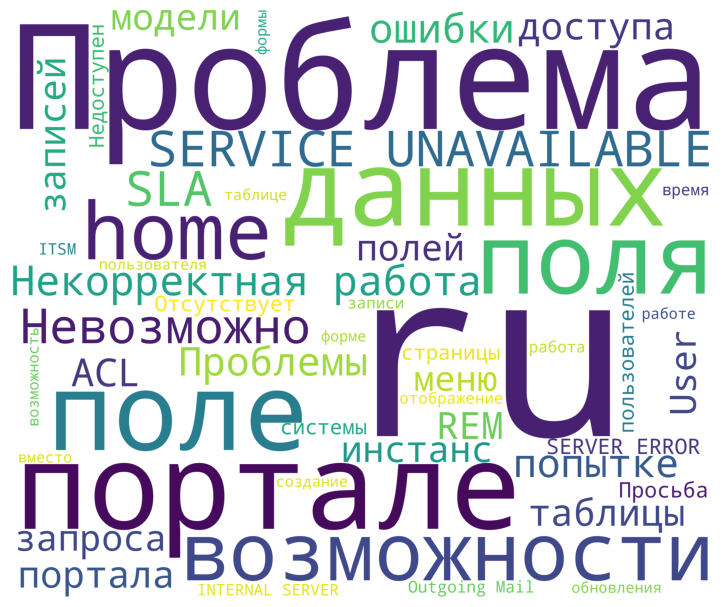

In [88]:
corpus = get_corpus(df_1['Тема'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

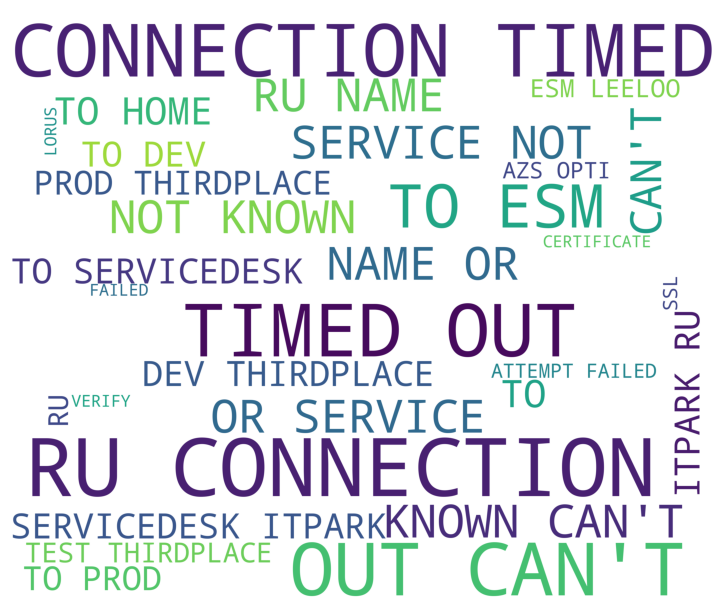

In [89]:
corpus = get_corpus(df_2['Тема'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)